In [83]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import plotly.graph_objects as go 

# Open highest agreement data from IAA.ipynb
df_path = Path.cwd().parent / 'data' / 'warnme-codeparty-all.csv'
df = pd.read_csv(df_path)
df = df.rename(columns={"Unnamed: 0": ""}).set_index("")
df["Sent On"] = pd.to_datetime(df["Sent On"])

## Frequency Analysis

In [15]:
cols = df.iloc[:,6:].columns.to_list()

for i in cols[:3]:
    print(df.value_counts(i))
    print("\n")

LOC_all
Address / Specific Named    143
Radius / Area                58
All campus                   46
Block                        36
Intersection                 25
Digital / Telephone           2
dtype: int64


PS_all
none                       237
Gender, No Race             34
No Race, Gender Neutral     26
Race, Gender                12
Race, Gender Neutral         1
dtype: int64


PV_all
none                       260
Gender, No Race             30
No Race, Gender Neutral     19
Race, Gender Neutral         1
dtype: int64




In [101]:
# Look at granularity of location data over time 
grouped = df.groupby(['Sent On', 'LOC_all']).size().reset_index(name='Counts')

# Pivot the DataFrame
pivot_df = grouped.pivot(index='Sent On', columns='LOC_all', values='Counts').fillna(0)
pivot_df = pivot_df[pivot_df.sum(axis=1) > 0]
fig = go.Figure()

# Add traces for each location type
for col in pivot_df[1:].columns:
    non_zero_data = pivot_df[pivot_df[col] > 0]
    fig.add_trace(
        go.Scatter(
            x=non_zero_data.index,
            y=non_zero_data[col],
            mode='markers',
            name=col
        )
    )

fig.update_layout(
    title='Location Granularity Over Time',
    yaxis_title='Count',
    xaxis_title='Date',
    xaxis=dict(
        rangeslider=dict(
            visible=True
        ),
        type='date'
    ),
    hovermode='x',
    overwrite=True 
)

# Show the plot
fig.show()


In [102]:
# Group by week and location category, then count occurrences
weekly_counts = df.groupby([pd.Grouper(key='Sent On', freq='W'), 'LOC_all']).size().reset_index(name='Counts')

# Pivot the DataFrame for easier plotting
pivot_df = weekly_counts.pivot(index='Sent On', columns='LOC_all', values='Counts').fillna(0)

# Plotting the data
fig = go.Figure()
for column in pivot_df.columns:
    fig.add_trace(go.Bar(
        x=pivot_df.index,
        y=pivot_df[column],
        name=column
    ))

# Update the layout to stack the bars
fig.update_layout(
    barmode='stack',
    title='Weekly Frequency of Different Location Granularities',
    xaxis_title='Week',
    yaxis_title='Frequency',
    xaxis=dict(tickmode='auto', nticks=20, tickformat='%Y-%m-%d'),
    hovermode='x'
)

# Show the plot
fig.show()

In [110]:
# Group by week and location category, then count occurrences
daily_counts = df.groupby([pd.Grouper(key='Sent On', freq='D'), 'LOC_all']).size().reset_index(name='Counts')

# Pivot the DataFrame for easier plotting
pivot_df = daily_counts.pivot(index='Sent On', columns='LOC_all', values='Counts').fillna(0)

# Filter out frequencies less than 3
filtered_pivot_df = pivot_df[pivot_df >= 3].fillna(0)

# Plotting the data
fig = go.Figure()
for column in filtered_pivot_df.columns:
    fig.add_trace(go.Bar(
        x=filtered_pivot_df.index,
        y=filtered_pivot_df[column],
        name=column
    ))

# Update the layout to stack the bars
fig.update_layout(
    barmode='stack',
    title='Daily Frequency of Different Location Granularities (Counts >= 3)',
    xaxis_title='Daily',
    yaxis_title='Frequency',
    xaxis=dict(tickmode='auto', nticks=20, tickformat='%Y-%m-%d'),
    hovermode='x'
)

# Show the plot
fig.show()

In [20]:
# DES1 & 2 value counts 
# Concatenate data from 2 DES columns into single Series
concatenated_data = pd.concat([df[col] for col in cols[3:]])

# Calculate value counts
concatenated_data.value_counts()

Safety Instructions / Tips    122
Reconstructed Scenario        116
none                          109
Touch                          53
People's Park                  35
Memorable detail               25
dtype: int64

## Case Study: People's Park

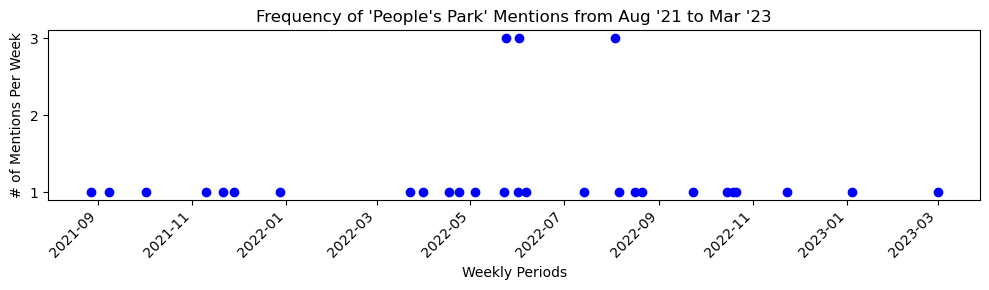

In [59]:
# Slice df for all messages labeled People's Park 
park_df = df.loc[(df['DES1_all'] == "People's Park") | (df['DES2_all'] == "People's Park")]
park_df.set_index('Sent On', inplace=True) # Set 'Sent On' as the index 
weekly_counts = park_df.resample('D').size() # Resample by Day ('D'), Month ('M'), Week ('W'), etc.
weekly_counts = weekly_counts[weekly_counts > 0]

# Plot the frequency of 
plt.figure(figsize=(10, 3))  # Increase figure size
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
weekly_counts.plot(kind='line',linestyle='None', marker='o', color='b')

plt.title("Frequency of 'People's Park' Mentions from Aug '21 to Mar '23")
plt.xlabel('Weekly Periods')
plt.ylabel('# of Mentions Per Week')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.tight_layout()  # Adjust layout to make room for label rotation
plt.show()

In [78]:
# Jittered representation of People's Park mentions 
park_df['Jittered_Y'] = 1 + (np.random.rand(len(park_df)) - 0.5) * 0.1  # Jitter around 1

fig = px.scatter(park_df, x='Sent On', y='Jittered_Y',
                 hover_data={'Sent On': '|%B %d, %Y', 'Message Title': True},
                 title='Individual WarnMes Coded as "People\'s Park" (with Jitter)')
fig.update_traces(marker=dict(size=5))  # Adjust marker size
fig.update_yaxes(visible=False)  # Hide y-axis as it's not meaningful
fig.show()